In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Data reading 

## reading the data from the first dataset 

In [1]:
import os
import cv2
import pandas as pd

# Function to load images from a given directory
def load_images_from_directory(directory, num_images):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(directory)):
        if i >= num_images:
            break
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(directory.split(os.sep)[-1])  # Use the folder name as the label
    return images, labels

# Load first 50 images from each tumor type directory
pituitary_tumor_images, pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\pituitary_tumor', 50
)
meningioma_tumor_images, meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\meningioma_tumor', 50
)
glioma_tumor_images, glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\glioma_tumor', 50
)
normal_images, normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Normal', 50
)

# Create dataframes for each tumor type
pituitary_tumor_df = pd.DataFrame({
    'image': pituitary_tumor_images,
    'label': pituitary_tumor_labels
})
meningioma_tumor_df = pd.DataFrame({
    'image': meningioma_tumor_images,
    'label': meningioma_tumor_labels
})
glioma_tumor_df = pd.DataFrame({
    'image': glioma_tumor_images,
    'label': glioma_tumor_labels
})

normal_df = pd.DataFrame({
    'image': normal_images,
    'label': normal_labels
})

# Display the dataframes
print(pituitary_tumor_df.head())
print(meningioma_tumor_df.head())
print(glioma_tumor_df.head())
print(normal_df.head())

                                               image            label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
2  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  pituitary_tumor
3  [[[41, 41, 41], [41, 41, 41], [41, 41, 41], [4...  pituitary_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
                                               image             label
0  [[[188, 188, 188], [180, 180, 180], [176, 176,...  meningioma_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
3  [[[40, 40, 40], [40, 40, 40], [40, 40, 40], [4...  meningioma_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
                                               image         label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  glioma_tumor
1  [[[0, 0, 0], [0, 

                                               image            label
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  pituitary_tumor
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  pituitary_tumor
2  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, ...  pituitary_tumor
3  [41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 4...  pituitary_tumor
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  pituitary_tumor
                                               image             label
0  [88, 88, 88, 66, 66, 66, 66, 66, 66, 66, 66, 6...  meningioma_tumor
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  meningioma_tumor
2  [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  meningioma_tumor
3  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 4...  meningioma_tumor
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  meningioma_tumor
                                               image         label
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  glioma_tumor
1  [0, 0, 0, 0, 0, 0

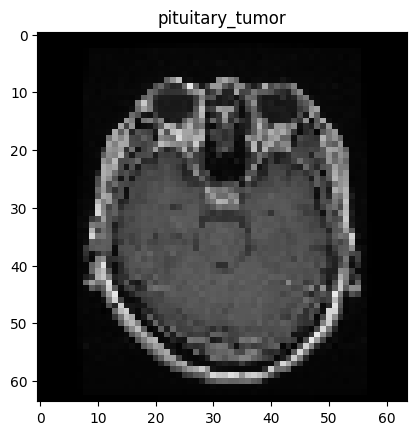

In [4]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load and resize images from a given directory
def load_images_from_directory(directory, num_images, image_size=(64, 64)):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(directory)):
        if i >= num_images:
            break
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image to a uniform size (e.g., 64x64)
                img_resized = cv2.resize(img, image_size)
                images.append(img_resized)
                # Use the folder name as the label
                labels.append(directory.split(os.sep)[-1])
    return images, labels

# Load first 50 images from each directory
pituitary_tumor_images, pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\pituitary_tumor', 50
)
meningioma_tumor_images, meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\meningioma_tumor', 50
)
glioma_tumor_images, glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\glioma_tumor', 50
)
normal_images, normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Normal', 50
)

# Create dataframes for each category
pituitary_tumor_df = pd.DataFrame({
    'image': [img.flatten() for img in pituitary_tumor_images],
    'label': pituitary_tumor_labels
})
meningioma_tumor_df = pd.DataFrame({
    'image': [img.flatten() for img in meningioma_tumor_images],
    'label': meningioma_tumor_labels
})
glioma_tumor_df = pd.DataFrame({
    'image': [img.flatten() for img in glioma_tumor_images],
    'label': glioma_tumor_labels
})
normal_df = pd.DataFrame({
    'image': [img.flatten() for img in normal_images],
    'label': normal_labels
})

# Display the dataframes
print(pituitary_tumor_df.head())
print(meningioma_tumor_df.head())
print(glioma_tumor_df.head())
print(normal_df.head())

# Visualize an image from the dataframe
def visualize_image_from_df(df, index, image_size=(64, 64)):
    img = df.loc[index, 'image']
    img = np.array(img).reshape(image_size[0], image_size[1], 3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[index, 'label'])
    plt.show()

# Example: Visualize the first image from the pituitary_tumor_df
visualize_image_from_df(pituitary_tumor_df, 0)


                                               image            label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
2  [[[0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], ...  pituitary_tumor
3  [[[41, 41, 41], [41, 41, 41], [42, 42, 42], [4...  pituitary_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
                                               image             label
0  [[[88, 88, 88], [66, 66, 66], [66, 66, 66], [6...  meningioma_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
2  [[[0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  meningioma_tumor
3  [[[40, 40, 40], [40, 40, 40], [40, 40, 40], [4...  meningioma_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
                                               image         label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  glioma_tumor
1  [[[0, 0, 0], [0, 

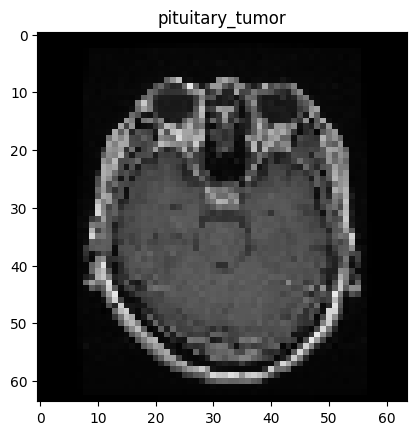

In [5]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Function to load images from a given directory
def load_images_from_directory(directory, num_images, image_size=(64, 64)):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(directory)):
        if i >= num_images:
            break
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image to a uniform size (e.g., 64x64)
                img_resized = cv2.resize(img, image_size)
                images.append(img_resized)
                # Use the folder name as the label
                labels.append(directory.split(os.sep)[-1])
    return images, labels

# Load first 50 images from each directory
pituitary_tumor_images, pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\pituitary_tumor', 50
)
meningioma_tumor_images, meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\meningioma_tumor', 50
)
glioma_tumor_images, glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\glioma_tumor', 50
)
normal_images, normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Normal', 50
)

# Create dataframes for each category
pituitary_tumor_df = pd.DataFrame({
    'image': pituitary_tumor_images,
    'label': pituitary_tumor_labels
})
meningioma_tumor_df = pd.DataFrame({
    'image': meningioma_tumor_images,
    'label': meningioma_tumor_labels
})
glioma_tumor_df = pd.DataFrame({
    'image': glioma_tumor_images,
    'label': glioma_tumor_labels
})
normal_df = pd.DataFrame({
    'image': normal_images,
    'label': normal_labels
})

# Display the dataframes
print(pituitary_tumor_df.head())
print(meningioma_tumor_df.head())
print(glioma_tumor_df.head())
print(normal_df.head())

# Visualize an image from the dataframe
def visualize_image_from_df(df, index):
    img = df.loc[index, 'image']
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[index, 'label'])
    plt.show()

# Example: Visualize the first image from the pituitary_tumor_df
visualize_image_from_df(pituitary_tumor_df, 0)


## Refining the data being read using interpolation technique from opencv

                                               image            label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
3  [[[41, 41, 41], [41, 41, 41], [41, 41, 41], [4...  pituitary_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
                                               image             label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
3  [[[40, 40, 40], [40, 40, 40], [40, 40, 40], [4...  meningioma_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
                                               image         label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  glioma_tumor
1  [[[0, 0, 0], [0, 

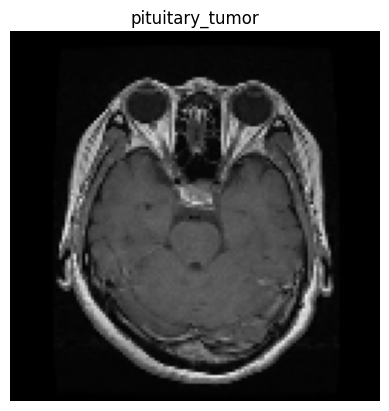

In [6]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and resize images from a given directory
def load_images_from_directory(directory, num_images, target_size=(128, 128)):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(directory)):
        if i >= num_images:
            break
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image with high-quality interpolation
                img_resized = resize_image(img, target_size)
                images.append(img_resized)
                # Use the folder name as the label
                labels.append(directory.split(os.sep)[-1])
    return images, labels

# Function to resize image while retaining aspect ratio
def resize_image(image, target_size):
    h, w = image.shape[:2]
    target_w, target_h = target_size

    # Calculate the scaling factor
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)

    # Resize image
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

    # Pad the resized image to maintain aspect ratio
    top = (target_h - new_h) // 2
    bottom = target_h - new_h - top
    left = (target_w - new_w) // 2
    right = target_w - new_w - left

    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image

# Load first 50 images from each directory
pituitary_tumor_images, pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\pituitary_tumor', 50
)
meningioma_tumor_images, meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\meningioma_tumor', 50
)
glioma_tumor_images, glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\glioma_tumor', 50
)
normal_images, normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Normal', 50
)

# Create dataframes for each category
pituitary_tumor_df = pd.DataFrame({
    'image': pituitary_tumor_images,
    'label': pituitary_tumor_labels
})
meningioma_tumor_df = pd.DataFrame({
    'image': meningioma_tumor_images,
    'label': meningioma_tumor_labels
})
glioma_tumor_df = pd.DataFrame({
    'image': glioma_tumor_images,
    'label': glioma_tumor_labels
})
normal_df = pd.DataFrame({
    'image': normal_images,
    'label': normal_labels
})

# Display the dataframes
print(pituitary_tumor_df.head())
print(meningioma_tumor_df.head())
print(glioma_tumor_df.head())
print(normal_df.head())

# Visualize an image from the dataframe
def visualize_image_from_df(df, index):
    img = df.loc[index, 'image']
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[index, 'label'])
    plt.axis('off')
    plt.show()

# Example: Visualize the first image from the pituitary_tumor_df
visualize_image_from_df(pituitary_tumor_df, 0)


                                               image            label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
3  [[[41, 41, 41], [41, 41, 41], [41, 41, 41], [4...  pituitary_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  pituitary_tumor
                                               image             label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
3  [[[40, 40, 40], [40, 40, 40], [40, 40, 40], [4...  meningioma_tumor
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  meningioma_tumor
                                               image         label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  glioma_tumor
1  [[[0, 0, 0], [0, 

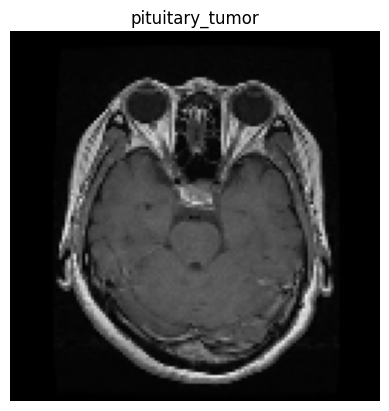

In [7]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and resize images from a given directory
def load_images_from_directory(directory, num_images, target_size=(128, 128)):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(directory)):
        if i >= num_images:
            break
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image with high-quality interpolation
                img_resized = resize_image(img, target_size)
                images.append(img_resized)
                # Use the folder name as the label
                labels.append(directory.split(os.sep)[-1])
    return images, labels

# Function to resize image while retaining aspect ratio
def resize_image(image, target_size):
    h, w = image.shape[:2]
    target_w, target_h = target_size

    # Calculate the scaling factor
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)

    # Resize image
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

    # Pad the resized image to maintain aspect ratio
    top = (target_h - new_h) // 2
    bottom = target_h - new_h - top
    left = (target_w - new_w) // 2
    right = target_w - new_w - left

    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image

# Load first 50 images from each initial directory
pituitary_tumor_images, pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\pituitary_tumor', 50
)
meningioma_tumor_images, meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\meningioma_tumor', 50
)
glioma_tumor_images, glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Tumor\glioma_tumor', 50
)
normal_images, normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\archive\Normal', 50
)

# Create dataframes for each category
pituitary_tumor_df = pd.DataFrame({
    'image': pituitary_tumor_images,
    'label': pituitary_tumor_labels
})
meningioma_tumor_df = pd.DataFrame({
    'image': meningioma_tumor_images,
    'label': meningioma_tumor_labels
})
glioma_tumor_df = pd.DataFrame({
    'image': glioma_tumor_images,
    'label': glioma_tumor_labels
})
normal_df = pd.DataFrame({
    'image': normal_images,
    'label': normal_labels
})

# Load first 50 images from new directories
new_pituitary_tumor_images, new_pituitary_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\braintumor\Training\pituitary_tumor', 50
)
new_meningioma_tumor_images, new_meningioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\braintumor\Training\meningioma_tumor', 50
)
new_glioma_tumor_images, new_glioma_tumor_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\braintumor\Training\glioma_tumor', 50
)
new_normal_images, new_normal_labels = load_images_from_directory(
    r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\braintumor\Training\no_tumor', 50
)

# Create temporary dataframes for new data
new_pituitary_tumor_df = pd.DataFrame({
    'image': new_pituitary_tumor_images,
    'label': new_pituitary_tumor_labels
})
new_meningioma_tumor_df = pd.DataFrame({
    'image': new_meningioma_tumor_images,
    'label': new_meningioma_tumor_labels
})
new_glioma_tumor_df = pd.DataFrame({
    'image': new_glioma_tumor_images,
    'label': new_glioma_tumor_labels
})
new_normal_df = pd.DataFrame({
    'image': new_normal_images,
    'label': new_normal_labels
})

# Append the new dataframes to the existing ones
pituitary_tumor_df = pd.concat([pituitary_tumor_df, new_pituitary_tumor_df], ignore_index=True)
meningioma_tumor_df = pd.concat([meningioma_tumor_df, new_meningioma_tumor_df], ignore_index=True)
glioma_tumor_df = pd.concat([glioma_tumor_df, new_glioma_tumor_df], ignore_index=True)
normal_df = pd.concat([normal_df, new_normal_df], ignore_index=True)

# Display the updated dataframes
print(pituitary_tumor_df.head())
print(meningioma_tumor_df.head())
print(glioma_tumor_df.head())
print(normal_df.head())

# Visualize an image from the dataframe
def visualize_image_from_df(df, index):
    img = df.loc[index, 'image']
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[index, 'label'])
    plt.axis('off')
    plt.show()

# Example: Visualize the first image from the updated pituitary_tumor_df
visualize_image_from_df(pituitary_tumor_df, 0)


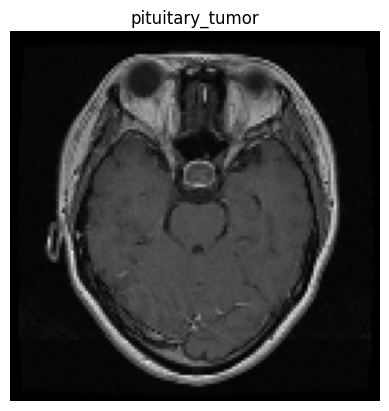

In [8]:
# Ensuring that data is read and appended properly by accesing the 51st element
visualize_image_from_df(pituitary_tumor_df, 51)

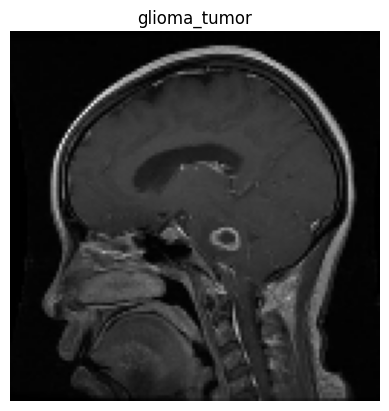

In [10]:
visualize_image_from_df(glioma_tumor_df, 99)

In [11]:
import os
import cv2

# Base directory
base_dir = r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\integrated_data"

# Function to save images from dataframe to the specified directory
def save_images_from_df(df, category_name):
    # Create category directory if it doesn't exist
    category_dir = os.path.join(base_dir, category_name)
    os.makedirs(category_dir, exist_ok=True)

    for idx, row in df.iterrows():
        img = row['image']
        label = row['label']
        # Construct the image file path
        img_filename = os.path.join(category_dir, f'{category_name}_{idx}.png')
        # Save the image
        cv2.imwrite(img_filename, img)

# Create the base directory if it doesn't exist
os.makedirs(base_dir, exist_ok=True)

# Save images for each category
save_images_from_df(pituitary_tumor_df, 'pituitary')
save_images_from_df(meningioma_tumor_df, 'meningioma')
save_images_from_df(glioma_tumor_df, 'glioma')
save_images_from_df(normal_df, 'normal')

print("Images saved successfully.")


Images saved successfully.


# Data Preprocessing

In [46]:
 # Importing Libraries and Defining Variables
import os
import pandas as pd
from PIL import Image

# Define the path to the main dataset directory
dataset_dir = r"C:\Users\vishn\Downloads\MINIPROJECT\project_folder\integrated_data"

# List of tumor types
tumor_types = ["glioma", "meningioma", "normal", "pituitary"]

# Dictionary to store dataframes for each tumor type
dataframes = {}


In [47]:
#Creating Dataframes for Each Tumor Type and Preprocessing Images

# Iterate over each tumor type
for tumor_type in tumor_types:
    tumor_type_dir = os.path.join(dataset_dir, tumor_type)
    image_paths = []
    # Iterate over each image in the tumor type directory
    for filename in os.listdir(tumor_type_dir):
        image_path = os.path.join(tumor_type_dir, filename)
        image_paths.append(image_path)
    # Create a dataframe for the tumor type
    dataframes[tumor_type] = pd.DataFrame({"image_path": image_paths, "tumor_type": tumor_type})

# Function to preprocess images
def spatial_normalization(image_path):
    # Open the image
    image = Image.open(image_path)
    # Resize the image
    resized_image = image.resize((500, 500)) 
    return resized_image

# Iterate over each tumor type dataframe and preprocess images
for tumor_type, df in dataframes.items():
    # Apply the preprocess_image function to each image path
    df["image"] = df["image_path"].apply(spatial_normalization)


In [48]:
#Displaying an Image from the Glioma DataFrame

# Access the dataframe for a specific tumor type
glioma_df = dataframes["glioma"]
# Access the first image in the glioma dataframe
first_glioma_image = glioma_df["image"][0]
# Display the image
first_glioma_image.show()


In [49]:
# Defining Dataframes for Other Tumor Types and Checking Images

# Define other tumor type dataframes
meningioma_df = dataframes["meningioma"]
normal_df = dataframes["normal"]
pituitary_df = dataframes["pituitary"]

# Checking for an image from the Meningioma DataFrame
menignioma_df_image_random = meningioma_df["image"][22]

menignioma_df_image_random.show()

In [56]:
import cv2
import numpy as np

# Intensity Normalization using OpenCV
def intensity_normalization(image):
    # Convert PIL Image to numpy array
    image_array = np.array(image)
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    normalized_image = gray_image / 255.0
    return normalized_image

# Apply preprocessing steps to the images (Intensity Normalization only)
def apply_intensity_normalization(df):
    df["image"] = df["image"].apply(intensity_normalization)
    return df


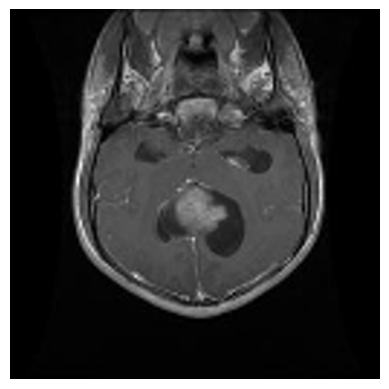

In [59]:
import matplotlib.pyplot as plt

# Access the Glioma DataFrame
glioma_df = dataframes["glioma"]

# Access the preprocessed image at index 22
glioma_image_22 = glioma_df["image"][22]

# Display the preprocessed image
plt.imshow(glioma_image_22, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()


In [62]:
import cv2
import numpy as np

# Grayscale Normalization using OpenCV
def grayscale_normalization(image):
    # Convert the image to grayscale using OpenCV
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Convert RGB to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif len(image.shape) == 2:
        # Image is already grayscale
        gray_image = image
    else:
        raise ValueError("Unsupported image format")

    # Convert grayscale image to float32 and normalize to the range [0, 1]
    normalized_grayscale_image = gray_image.astype(np.float32) / 255.0
    return normalized_grayscale_image

# Apply preprocessing steps to the images (Grayscale Normalization)
def apply_grayscale_normalization(df):
    df["image"] = df["image"].apply(grayscale_normalization)
    return df

# Apply grayscale normalization to each tumor type DataFrame
glioma_df = apply_grayscale_normalization(glioma_df)
meningioma_df = apply_grayscale_normalization(meningioma_df)
normal_df = apply_grayscale_normalization(normal_df)
pituitary_df = apply_grayscale_normalization(pituitary_df)


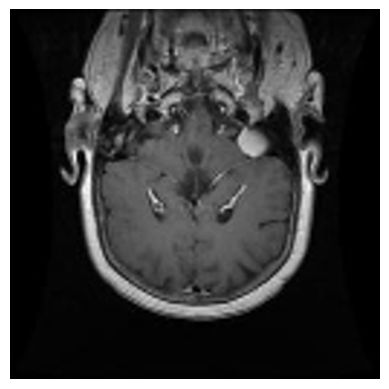

In [69]:
import matplotlib.pyplot as plt

# Access the preprocessed image at index 22
meningioma_image_22 = meningioma_df["image"][22]

# Display the preprocessed image
plt.imshow(meningioma_image_22, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [71]:
# Saving preprocessed images
import os
import cv2

# Base directory where preprocessed images will be saved
base_dir = r'C:\Users\vishn\Downloads\MINIPROJECT\project_folder\preprocessed_images'

# Function to save images from dataframe to the specified directory
def save_images_from_df(df, category_name):
    # Create category directory if it doesn't exist
    category_dir = os.path.join(base_dir, category_name)
    os.makedirs(category_dir, exist_ok=True)

    for idx, row in df.iterrows():
        img = row['image']
        # Construct the image file path
        img_filename = os.path.join(category_dir, f'{category_name}_{idx}.png')
        # Save the image
        cv2.imwrite(img_filename, img)

# Create the base directory if it doesn't exist
os.makedirs(base_dir, exist_ok=True)

# Save images for each category
save_images_from_df(pituitary_df, 'pituitary')
save_images_from_df(meningioma_df, 'meningioma')
save_images_from_df(glioma_df, 'glioma')
save_images_from_df(normal_df, 'normal')

print("Images saved successfully.")


Images saved successfully.
